In [15]:
import numpy as np
import numpy_financial as npf

#dane dot. ceny mieszkania
pv=120000
freq=12
rate=0.05
years=5

#oprocentowanie lokaty
ir=0.12

ir /=freq
rate /=freq

nper=years*freq

periods=np.arange(1,nper+1,dtype=int)

#przyszła cena mieszkania i ceny co miesiąc
fv=-np.around(npf.fv(rate,periods,0,pv),2)
fv

array([120500.  , 121002.08, 121506.26, 122012.53, 122520.92, 123031.42,
       123544.06, 124058.82, 124575.73, 125094.8 , 125616.03, 126139.43,
       126665.01, 127192.78, 127722.75, 128254.93, 128789.32, 129325.95,
       129864.8 , 130405.91, 130949.26, 131494.89, 132042.78, 132592.96,
       133145.43, 133700.2 , 134257.29, 134816.69, 135378.43, 135942.51,
       136508.93, 137077.72, 137648.88, 138222.41, 138798.34, 139376.67,
       139957.4 , 140540.56, 141126.15, 141714.17, 142304.65, 142897.58,
       143492.99, 144090.88, 144691.26, 145294.14, 145899.53, 146507.44,
       147117.89, 147730.88, 148346.43, 148964.54, 149585.22, 150208.49,
       150834.36, 151462.84, 152093.93, 152727.66, 153364.02, 154003.04])

obliczanie comiesięcznej kwoty do wpłaty na lokatę:

In [9]:
pmt=-npf.pmt(ir,nper,0,fv[-1])
pmt

1875.2835693994307

array do wykresu ilości pieniędzy na lokacie:

In [19]:
deposit=[pmt+pmt*ir]
for i in range(0,nper-1):
    deposit.append((deposit[i]+pmt)+(deposit[i]+pmt)*ir)
deposit2=np.array(deposit)
deposit2

array([  1894.03640509,   3807.01317424,   5739.11971107,   7690.54731328,
         9661.4891915 ,  11652.14048851,  13662.69829849,  15693.36168657,
        17744.33170853,  19815.81143071,  21908.00595011,  24021.1224147 ,
        26155.37004394,  28310.96014948,  30488.10615606,  32687.02362272,
        34907.93026404,  37151.04597177,  39416.59283658,  41704.79517004,
        44015.87952684,  46350.0747272 ,  48707.61187956,  51088.72440345,
        53493.64805258,  55922.6209382 ,  58375.88355268,  60853.6787933 ,
        63356.25198632,  65883.85091128,  68436.72582548,  71015.12948883,
        73619.31718881,  76249.5467658 ,  78906.07863855,  81589.17583003,
        84299.10399342,  87036.13143845,  89800.52915793,  92592.5708546 ,
        95412.53296824,  98260.69470301, 101137.33805514, 104042.74784078,
       106977.21172428, 109941.02024662, 112934.46685418, 115957.84792781,
       119011.46281219, 122095.6138454 , 125210.60638895, 128356.74885793,
       131534.3527516 , 1

Text(0, 0.5, 'Wartość')

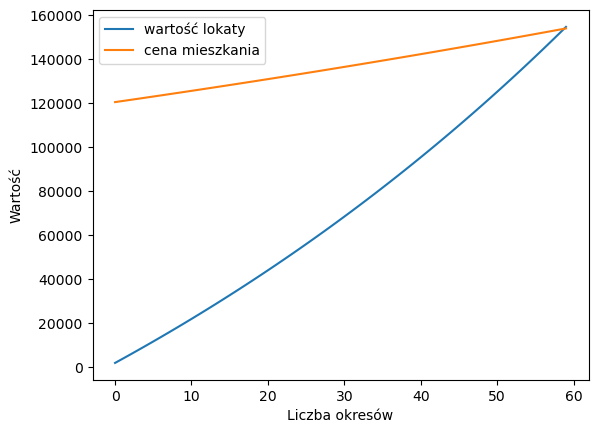

In [21]:
import matplotlib.pyplot as plt

plt.plot(deposit2,label='wartość lokaty')
plt.plot(fv,label='cena mieszkania')
plt.legend()
plt.xlabel('Liczba okresów')
plt.ylabel('Wartość')